### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:

#### 1. User attributes

  - Gender: male, female.
  - Age: below 21, 21 to 25, 26 to 30, etc.
  - Marital Status: single, married partner, unmarried partner, or widowed.
  - Number of children: 0, 1, or more than 1.
  - Education: high school, bachelors degree, associates degree, or graduate degree.
  - Occupation: architecture & engineering, business & financial, etc.
  - Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
  - Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8.
  - Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater than 8.
  - Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or greater than 8.
  - Number of times that he/she eats at a restaurant with average expense less than $20 per person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8.
  - Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8.

#### 2. Contextual attributes
- Driving destination: home, work, or no urgent destination.
- Location of user, coupon and destination: we provide a map to show the geographical location of the user, destination, and the venue, and we mark the distance between each two places with time of driving. The user can see whether the venue is in the same direction as the destination.
- Weather: sunny, rainy, or snowy.
- Temperature: 30F, 55F, or 80F.
- Time: 10AM, 2PM, or 6PM.
- Passenger: alone, partner, kid(s), or friend(s).

#### 3. Coupon attributes
- time before it expires: 2 hours or one day.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import io

### Problems

Use the prompts below to get started with your data analysis.  
#### =========================================================================
# **1. Read in the `coupons.csv` file.**
#### =========================================================================



In [2]:
df = pd.read_csv('data/coupons.csv')

In [3]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


<p align=""><strong>Starting...</strong></p>

<h1 align="center">#A Basic Preliminary Review</h1>

<h3 align="center"><span style="color:purple">Solutions & Outputs </span></h3>
<h3 align="center"><span style="color:green">by JoseLuis Alvarez G</span></h3>

<p align=""><strong>Developer with ❤️</strong></p>


### type(), info(), describe()

In [4]:
# Eval if 'df' is a DataFrame. [Solution-1A]

df_type = type(df)

# ================================= Styles for Outputs =========================
output = str(df_type)
color_start = '\033[92m'
color_end = '\033[0m'

print(f"╔{'═' * (len(output) + 32)}╗")
print(f"║ type(df) Output and Solution: {color_start}{output}{color_end} ║")
print(f"╚{'═' * (len(output) + 32)}╝")
# ================================= Styles for Outputs =========================

╔═════════════════════════════════════════════════════════════════════╗
║ type(df) Output and Solution: <class 'pandas.core.frame.DataFrame'> ║
╚═════════════════════════════════════════════════════════════════════╝


In [5]:
# info() summary of a DataFrame: umber of non-null entries, data types of each column, and memory usage. [Solution-1B]

# Redirect df.info() output to a string
buffer = io.StringIO()
df.info(buf=buffer)
info_str = buffer.getvalue()
lines = info_str.split('\n')

# ================================= Styles for Outputs =========================
header = "df.info() Output and Solution:"
lines.insert(0, header)

max_length = max(len(line) for line in lines)

top_border = f"╔{'═' * (max_length + 2)}╗"
middle_border = f"╠{'═' * (max_length + 2)}╣"
bottom_border = f"╚{'═' * (max_length + 2)}╝"
side_border = "║"

print(top_border)
print(f"{side_border} {header:^{max_length}} {side_border}")
print(middle_border)
for line in lines[1:]:
    print(f"{side_border} {line.ljust(max_length)} {side_border}")

print(bottom_border)
# ================================= Styles for Outputs =========================

╔═══════════════════════════════════════════════════╗
║          df.info() Output and Solution:           ║
╠═══════════════════════════════════════════════════╣
║ <class 'pandas.core.frame.DataFrame'>             ║
║ RangeIndex: 12684 entries, 0 to 12683             ║
║ Data columns (total 26 columns):                  ║
║  #   Column                Non-Null Count  Dtype  ║
║ ---  ------                --------------  -----  ║
║  0   destination           12684 non-null  object ║
║  1   passanger             12684 non-null  object ║
║  2   weather               12684 non-null  object ║
║  3   temperature           12684 non-null  int64  ║
║  4   time                  12684 non-null  object ║
║  5   coupon                12684 non-null  object ║
║  6   expiration            12684 non-null  object ║
║  7   gender                12684 non-null  object ║
║  8   age                   12684 non-null  object ║
║  9   maritalStatus         12684 non-null  object ║
║  10  has_children         

In [6]:
# Summary statistics for numerical columns in a df. [Solution-1C]
print('=======================================================================')
print('                   df.describe() Output and Solution:                  ')
print('=======================================================================')
print(df.describe())
print('=======================================================================')

                   df.describe() Output and Solution:                  
        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671     

### Attributes of the DataFrame (df):

In [7]:
# Styles for Output and Solutions, Because details matter, Steve Jobs.
# ================================= Styles-2 for Outputs =========================
def print_styled_output(attribute_name, output):
    color_start = '\033[92m'
    color_end = '\033[0m'
    text1 = f"{attribute_name} Output and Solution:"
    text2 = f"{color_start}{output}{color_end}"
    
    width1 = len(text1)
    width2 = len(text2)
    
    total_width = width1 + width2 + 5

    print(f"╔{'═' * (width1 + 2)}╦{'═' * (width2 - 7)}╗")
    
    text1_padded = text1.ljust(width1)
    text2_padded = text2.ljust(width2)
    
    print(f"║ {text1_padded} ║ {text2_padded} ║")
    
    print(f"╚{'═' * (width1 + 2)}╩{'═' * (width2 - 7)}╝")
# ================================= Styles-2 for Outputs =========================

### df.shape: rows by columns:

In [8]:
output = str(df.shape)
print_styled_output('df.shape', output)

╔═══════════════════════════════╦═════════════╗
║ df.shape Output and Solution: ║ (12684, 26) ║
╚═══════════════════════════════╩═════════════╝


### df.size: Size (rows x Cols):

In [9]:
output = str(df.size)
print_styled_output('df.size', output)

╔══════════════════════════════╦════════╗
║ df.size Output and Solution: ║ 329784 ║
╚══════════════════════════════╩════════╝


### Dimension of the DataFrame:

In [10]:
output = str(df.ndim)
print_styled_output('df.ndim', output)

╔══════════════════════════════╦═══╗
║ df.ndim Output and Solution: ║ 2 ║
╚══════════════════════════════╩═══╝


### Index rows:

In [11]:
output = str(df.index)
print_styled_output('df.index', output)

╔═══════════════════════════════╦═════════════════════════════════════════╗
║ df.index Output and Solution: ║ RangeIndex(start=0, stop=12684, step=1) ║
╚═══════════════════════════════╩═════════════════════════════════════════╝


### df.columns: Show only names cols:

In [12]:
# Get column names with indices
columns_with_indices = [(i, col) for i, col in enumerate(df.columns)]

# ================================= Styles for Outputs =========================
header = "Column Indices and Names Output:"
lines = [header] + [f"{i}: {col}" for i, col in columns_with_indices]

max_length = max(len(line) for line in lines)

top_border = f"╔{'═' * (max_length + 2)}╗"
middle_border = f"╠{'═' * (max_length + 2)}╣"
bottom_border = f"╚{'═' * (max_length + 2)}╝"
side_border = "║"

print(top_border)
print(f"{side_border} {header:^{max_length}} {side_border}")
print(middle_border)
for line in lines[1:]:
    print(f"{side_border} {line.ljust(max_length)} {side_border}")
# ================================= Styles for Outputs =========================

print(bottom_border)

╔══════════════════════════════════╗
║ Column Indices and Names Output: ║
╠══════════════════════════════════╣
║ 0: destination                   ║
║ 1: passanger                     ║
║ 2: weather                       ║
║ 3: temperature                   ║
║ 4: time                          ║
║ 5: coupon                        ║
║ 6: expiration                    ║
║ 7: gender                        ║
║ 8: age                           ║
║ 9: maritalStatus                 ║
║ 10: has_children                 ║
║ 11: education                    ║
║ 12: occupation                   ║
║ 13: income                       ║
║ 14: car                          ║
║ 15: Bar                          ║
║ 16: CoffeeHouse                  ║
║ 17: CarryAway                    ║
║ 18: RestaurantLessThan20         ║
║ 19: Restaurant20To50             ║
║ 20: toCoupon_GEQ5min             ║
║ 21: toCoupon_GEQ15min            ║
║ 22: toCoupon_GEQ25min            ║
║ 23: direction_same               ║
║

#### =========================================================================
# 2. Investigate the dataset for missing or problematic data.
#### =========================================================================

### Shows the number of null values in each column and % of null values in each column:

In [13]:
# Count Null in each column:
null_counts = df.isnull().sum()

# Porcentaje of Null each column
porcentaje_nulos = df.isnull().sum() * 100 / len(df)

# ================================= Styles for Outputs =========================
header = "Column and Null Counts and Percentages"
lines = [f"{col.ljust(30)}{count:<10}{perc:.2f}%" for col, count, perc in 
         zip(null_counts.index, null_counts.values, porcentaje_nulos.values)]

max_length = max(len(line) for line in lines)
max_length = max(max_length, len(header))

top_border = f"╔{'═' * (max_length + 2)}╗"
middle_border = f"╠{'═' * (max_length + 2)}╣"
bottom_border = f"╚{'═' * (max_length + 2)}╝"
side_border = "║"

print(top_border)
print(f"{side_border} {header:^{max_length}} {side_border}")
print(middle_border)
for line in lines:
    print(f"{side_border} {line.ljust(max_length)} {side_border}")
# ================================= Styles for Outputs =========================
print(bottom_border)

╔════════════════════════════════════════════════╗
║     Column and Null Counts and Percentages     ║
╠════════════════════════════════════════════════╣
║ destination                   0         0.00%  ║
║ passanger                     0         0.00%  ║
║ weather                       0         0.00%  ║
║ temperature                   0         0.00%  ║
║ time                          0         0.00%  ║
║ coupon                        0         0.00%  ║
║ expiration                    0         0.00%  ║
║ gender                        0         0.00%  ║
║ age                           0         0.00%  ║
║ maritalStatus                 0         0.00%  ║
║ has_children                  0         0.00%  ║
║ education                     0         0.00%  ║
║ occupation                    0         0.00%  ║
║ income                        0         0.00%  ║
║ car                           12576     99.15% ║
║ Bar                           107       0.84%  ║
║ CoffeeHouse                  

---
### Shows the number of duplicate rows:
**Conclusion:** This is not necessarily an error in this case, because it is a survey and there may be random matches:

In [14]:
# df.duplicated().sum()

output = str(df.duplicated().sum())
print_styled_output('df.duplicated().sum()', output)

╔════════════════════════════════════════════╦════╗
║ df.duplicated().sum() Output and Solution: ║ 74 ║
╚════════════════════════════════════════════╩════╝


### Heatmap of Null Values in the DataFrame:

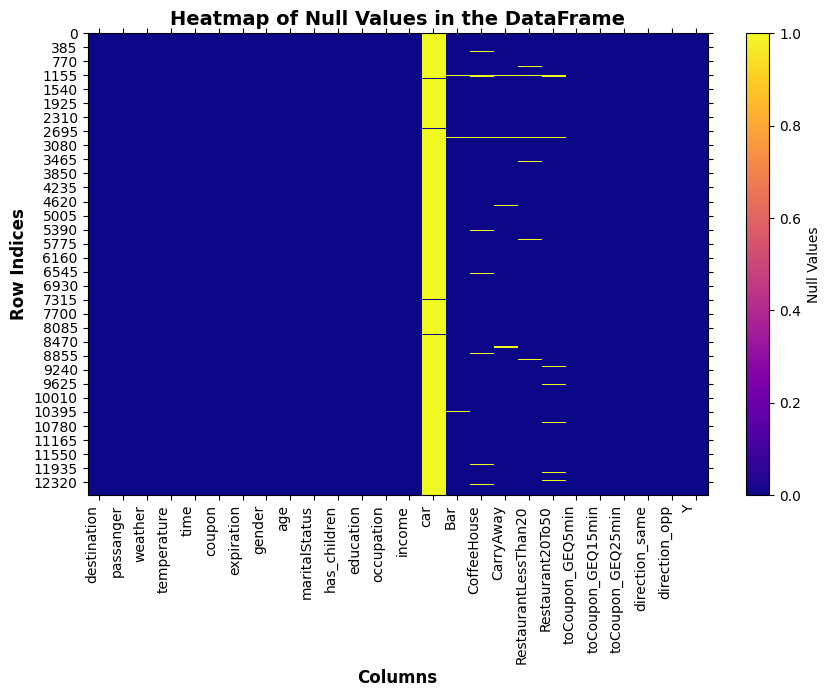

In [15]:
null_values = df.isnull().values
plt.figure(figsize=(10, 6))
plt.imshow(null_values, cmap='plasma', aspect='auto', interpolation='nearest')
plt.colorbar(label='Null Values')
plt.xlabel('Columns', fontsize=12, weight='bold')
plt.ylabel('Row Indices', fontsize=12, weight='bold')
plt.title('Heatmap of Null Values in the DataFrame', fontsize=14, weight='bold')
plt.gca().yaxis.set_ticks_position('both')
plt.gca().xaxis.set_ticks_position('both')
plt.xticks(ticks=np.arange(len(df.columns)), labels=df.columns, rotation=90, ha='right')
y_ticks = np.arange(0, null_values.shape[0], 385)
plt.yticks(ticks=y_ticks, labels=y_ticks)
plt.grid(False)
plt.show()

#### =========================================================================
# 3. Decide what to do about your missing data -- drop, replace, other...
#### =========================================================================

#### Theoretical Foundation:

**Low Null Values (0% to 2%):**
For columns such as **Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50**, where the percentage of null values is low (less than 2%), it may be considered to impute these values with the mean or median, or the mode for non-numeric values, as they will not significantly affect the analysis.

**High Null Values (> 90%):**
The column **car** has 99.15% null values. Some options are:

1. **Delete the Column**: If most of the data is missing and it is not crucial for the analysis, it is best to delete it.
2. **Impute with a Specific Value:** If there are reasons to believe that the missing data could be informative (e.g., it could represent people without a car), a value such as "no" or "0" could be imputed.
3. **Further Analysis:** Conduct deeper analysis to understand why certain values are missing. This could help decide whether to impute or delete columns.
4. **Review Correlations:** Before making decisions, check if the columns with null values have any relationship with the variables of interest, especially if they impact the target variable Y.
5. **Advanced Imputation:** If imputation is decided, consider more advanced methods such as model-based imputation (e.g., using KNNImputer from sklearn), especially for columns with moderate null values. (Not applicable in this part of the course).

#### Possible Strategies to Handle Nulls in the df

Depending on the nature of the data and the objective, some options are:

1. **Fill Null Values with a Specific Value**:
    ```python
    df['Bar'].fillna('default_value', inplace=True)
    ```
 2. **Fill with the Most Frequent Value (Mode)**:
    ```python
    df['Bar'].fillna(df['Bar'].mode()[0], inplace=True)
    ```
 3. **Remove Rows with Null Values**:
    ```python
    df.dropna(subset=['Bar'], inplace=True)
    ```
 4. **Replace Nulls with an Empty String**:
    ```python
    df['Bar'].fillna('', inplace=True)
    ```
 5. **Use the `interpolate` Method if Suitable (though uncommon for non-numeric columns)**:
    ```python
    df['Bar'] = df['Bar'].interpolate()
    ```

Therefore, before using any of the above strategies, it is necessary to analyze the relationship between non-null values in **car** by checking the unique values of the **'car'** column and their frequency with respect to the column of interest **Y**:


In [16]:
print('====================================================')
print('Relative Frequency of "car" for Null and Non-Null:')
print('====================================================')
car_value_counts = df['car'].value_counts(dropna=False)
print(car_value_counts)
print('====================================================')
print('Values of Y=1 with "car" is no-Null y Null;')
print('====================================================')
car_Y1_counts = df[df['Y'] == 1]['car'].value_counts(dropna=False)
print(car_Y1_counts)

Relative Frequency of "car" for Null and Non-Null:
car
NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64
Values of Y=1 with "car" is no-Null y Null;
car
NaN                                         7148
Car that is too old to install Onstar :D      17
Mazda5                                        16
Scooter and motorcycle                        11
do not drive                                  10
crossover                                      8
Name: count, dtype: int64


---
**From the obtained results:**

1. It is not conclusive that there is no direct relationship between the **car** and **Y** columns, because although there are 7210 instances where **Y=1** and **car** is either **Null** or **non-Null**, only 62 of these are where **Y=1** and **car** is **non-Null**, which equals **0.85%**. This is a good criterion to **remove the column**. Additionally,

2. It can be observed that the filled entries in **car** do not all relate to each other, making it unclear whether the column refers to: whether a vehicle is owned, whether there is a specific type of vehicle, or another aspect. Therefore, it is not prudent to assume, and this point is crucial for the decision to **remove the column**.

#### But first, make a copy of the **df**:

In [17]:
# Copy  of df to df_mod.
df_mod = df.copy()

# Eval copy
df_mod.equals(df)

True

## **IMPORTANT NOTE**: 
### From here on, we will work with **df_mod** (modified df) to continue with the analysis.

### Delete column **car**:

In [18]:
df_mod = df_mod.drop(columns=['car'])

#### VISUALIZE if the *car* column has been removed:

In [19]:
print('=============================================================================')
print('                               df_mod.columns                                ')
print('=============================================================================')
print(df_mod.columns)
print('=============================================================================')

                               df_mod.columns                                
Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')


---------------------------------
For the remaining columns with null values < 2%, the **Null** values will be imputed with the **mode** (the most frequently occurring value).  
To calculate the mode, the following is used:  
```python
mode_value = df['Bar'].mode()
```  
But for simplicity and academic purposes, the following was used:  
```python
mode_value = df['Bar'].mode()[0]
```  
This returns a mode value in case there are multiple modes.

### **mode** of **Bar**:

In [20]:
mode_value = df_mod['Bar'].mode()[0]
mode_value

'never'

### Impute Null with the **mode** in column **Bar**:

In [21]:
df_mod.fillna({'Bar': mode_value}, inplace=True)

### **mode** of **CoffeeHouse**:

In [22]:
mode_value = df_mod['CoffeeHouse'].mode()[0]
mode_value

'less1'

### Impute Null with the **mode** in column **CoffeeHouse**:

In [23]:
df_mod.fillna({'CoffeeHouse': mode_value}, inplace=True)

### **mode** of **CarryAway**:

In [24]:
mode_value = df['CarryAway'].mode()[0]
mode_value

'1~3'

### Impute Null with the **mode** in column **CarryAway**:

In [25]:
df_mod.fillna({'CarryAway': mode_value}, inplace=True)

### **mode** of **RestaurantLessThan20**:

In [26]:
mode_value = df['RestaurantLessThan20'].mode()[0]
mode_value

'1~3'

### Impute Null with the **mode** in column **RestaurantLessThan20**:

In [27]:
df_mod.fillna({'RestaurantLessThan20': mode_value}, inplace=True)

### **mode** of **Restaurant20To50**:

In [28]:
mode_value = df['Restaurant20To50'].mode()[0]
mode_value

'less1'

### Impute Null with the **mode** in column **Restaurant20To50**:

In [29]:
df_mod.fillna({'Restaurant20To50': mode_value}, inplace=True)

---
### Eval the Null of **df_mod**:
Calculate the percentage of null values per column.

In [30]:
porcentaje_nulos = df_mod.isnull().sum() * 100 / len(df)
print('=============================')
print('       Null of df_mod:       ')
print('=============================')
print(porcentaje_nulos)
print('=============================')

       Null of df_mod:       
destination             0.0
passanger               0.0
weather                 0.0
temperature             0.0
time                    0.0
coupon                  0.0
expiration              0.0
gender                  0.0
age                     0.0
maritalStatus           0.0
has_children            0.0
education               0.0
occupation              0.0
income                  0.0
Bar                     0.0
CoffeeHouse             0.0
CarryAway               0.0
RestaurantLessThan20    0.0
Restaurant20To50        0.0
toCoupon_GEQ5min        0.0
toCoupon_GEQ15min       0.0
toCoupon_GEQ25min       0.0
direction_same          0.0
direction_opp           0.0
Y                       0.0
dtype: float64


### New Heatmap of Null Values in the DataFrame **df_mod**:

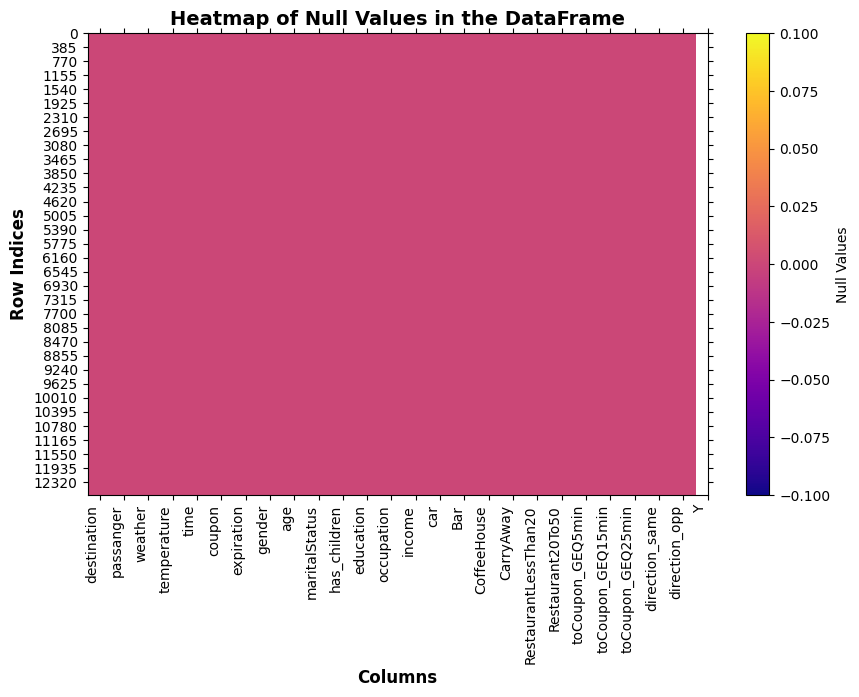

In [31]:
null_values = df_mod.isnull().values

plt.figure(figsize=(10, 6))
plt.imshow(null_values, cmap='plasma', aspect='auto', interpolation='nearest')
plt.colorbar(label='Null Values')

plt.xlabel('Columns', fontsize=12, weight='bold')
plt.ylabel('Row Indices', fontsize=12, weight='bold')
plt.title('Heatmap of Null Values in the DataFrame', fontsize=14, weight='bold')

plt.gca().yaxis.set_ticks_position('both')
plt.gca().xaxis.set_ticks_position('both')

plt.xticks(ticks=np.arange(len(df.columns)), labels=df.columns, rotation=90, ha='right')

y_ticks = np.arange(0, null_values.shape[0], 385)
plt.yticks(ticks=y_ticks, labels=y_ticks)

plt.grid(False)

plt.show()

**Data Clean!**

#### =========================================================================
# 4. What proportion of the total observations chose to accept the coupon? 
#### =========================================================================


### The proportion of observations that accepted the coupon:

In [32]:
accept_coupon_proportion = df_mod['Y'].mean()

# print percent:
output = f"{accept_coupon_proportion:.2%}"
print_styled_output('The proportion of observations that accepted the coupon is:', output)

╔══════════════════════════════════════════════════════════════════════════════════╦════════╗
║ The proportion of observations that accepted the coupon is: Output and Solution: ║ 56.84% ║
╚══════════════════════════════════════════════════════════════════════════════════╩════════╝


#### =========================================================================
# 5. Use a bar plot to visualize the `coupon` column.
#### =========================================================================

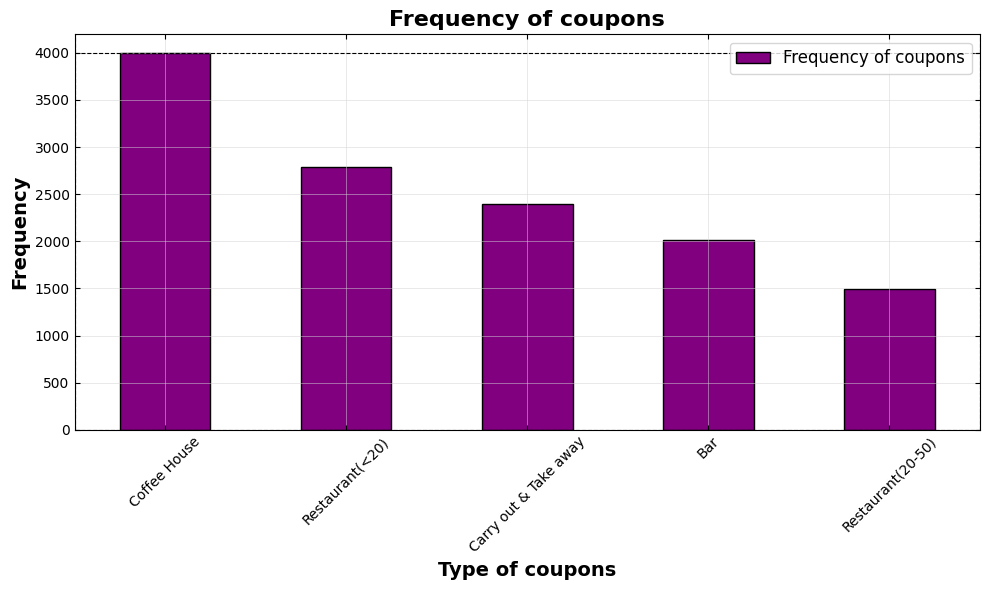

In [33]:
# Count frecuency of 'coupon'
coupon_counts = df_mod['coupon'].value_counts()

# Plot bar
plt.figure(figsize=(10, 6))
bars = coupon_counts.plot(kind='bar', color='purple', edgecolor='black', label='Frequency of coupons')

plt.title('Frequency of coupons', fontsize=16, weight='bold')
plt.xlabel('Type of coupons', fontsize=14, fontweight='bold', family='sans-serif')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', family='sans-serif')
plt.xticks(rotation=45)

plt.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.7)

plt.gca().patch.set_facecolor('white')

ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

plt.gca().yaxis.set_ticks_position('both')
plt.gca().xaxis.set_ticks_position('both')
ax.tick_params(axis='both', direction='in')

plt.axhline(0, color='black', linewidth=0.8, ls='--')
plt.axhline(coupon_counts.max(), color='black', linewidth=0.8, ls='--')
plt.axvline(-0.5, color='black', linewidth=0.8, ls='--')
plt.axvline(len(coupon_counts) - 0.5, color='black', linewidth=0.8, ls='--')

plt.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

#### =========================================================================
# 6. Use a histogram to visualize the temperature column.
#### =========================================================================

### Get unique categories from the **temperature** column:

In [34]:
unique_categories  = df_mod['temperature'].unique()

output = str(unique_categories)
print_styled_output('Unique categories in "temperature":', output)

╔══════════════════════════════════════════════════════════╦════════════╗
║ Unique categories in "temperature": Output and Solution: ║ [55 80 30] ║
╚══════════════════════════════════════════════════════════╩════════════╝


### So we have **Temperature Distribution**:

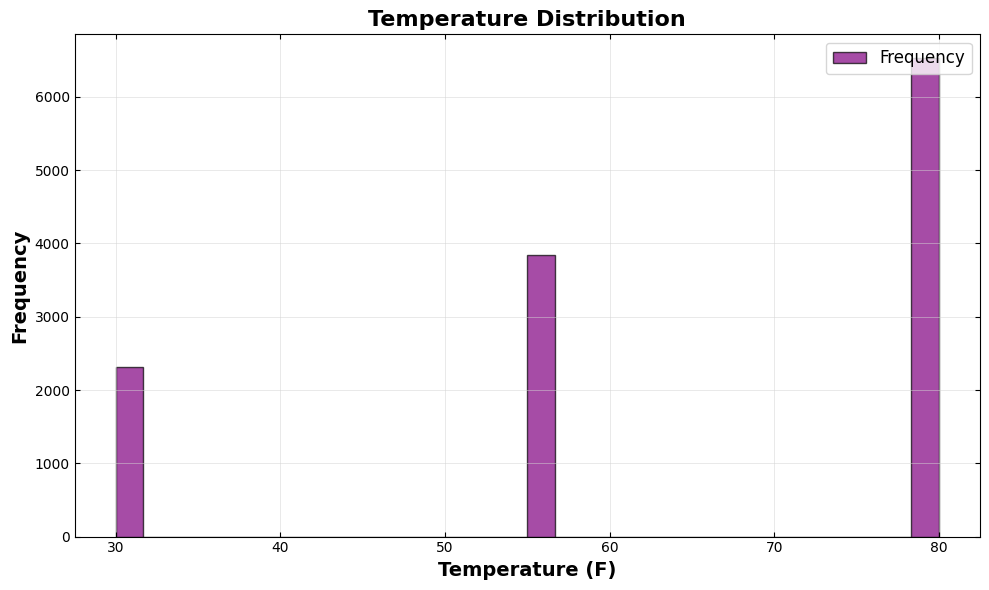

In [35]:
# Hist temperature
column_name = 'temperature'

# Plot Hist
plt.figure(figsize=(10, 6))
plt.hist(df_mod[column_name].dropna(), bins=30, edgecolor='black', color='purple', alpha=0.7)

plt.title('Temperature Distribution', fontsize=16, weight='bold')
plt.xlabel('Temperature (F)', fontsize=14, fontweight='bold', family='sans-serif')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', family='sans-serif')

plt.grid(color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.7)

plt.gca().patch.set_facecolor('white')

ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

plt.gca().yaxis.set_ticks_position('both')
plt.gca().xaxis.set_ticks_position('both')
ax.tick_params(axis='both', direction='in')


plt.legend(['Frequency'], loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

**Conclusion:** _Importan Note:_ To determine in which season of the year these temperatures might occur, typical temperature ranges for each season in different regions can be considered. However, a general idea based on typical ranges in many areas of the U.S. is:

- 55°F: Spring or fall
- 80°F: Summer
- 30°F: Winter

This could suggest that **the survey** was conducted in different seasons of the year, but it is not conclusive. It would be necessary to gather information about the exact dates to confirm the conclusions drawn here.

---

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  
#### =========================================================================
# 1. Create a new `DataFrame` that contains just the bar coupons.
#### =========================================================================

In [36]:
df_bar_coupons = df_mod[df_mod['coupon'] == 'Bar']

# Checking some data from new data frame: df_bar_coupons
df_bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


## **IMPORTANT NOTE**: 
### From here on, we will work with **df_bar_coupons** to continue with the analysis.

#### =========================================================================
# 2. What proportion of bar coupons were accepted?
#### =========================================================================

#### NOTE: Here use **df_bar_coupons**
Where categories of `df_mod` are not equal to `df_bar_coupons`:

In [37]:
unique_categories  = df_mod['coupon'].unique()

print("Unique categories in 'coupon':", unique_categories)

Unique categories in 'coupon': ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


In [38]:
unique_categories = df_bar_coupons['coupon'].unique()

print("Unique categories in 'coupon':", unique_categories)

Unique categories in 'coupon': ['Bar']


### Calculating the proportion of coupons accepted by category:

In [39]:
df_filtered = df_bar_coupons

proportions = df_filtered.groupby('Bar')['Y'].mean()
print('========================')
print('Proportions by category:')
print('========================')
print(proportions)
print('========================')

Proportions by category:
Bar
1~3      0.647355
4~8      0.780000
gt8      0.734694
less1    0.443860
never    0.192714
Name: Y, dtype: float64


#### =========================================================================
# 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
#### =========================================================================

### Compare acceptance rates:

In [40]:
# Filter rows where 'Y' is not null
valid_entries = df_bar_coupons[df_bar_coupons['Y'].notnull()]

# Calculating proportions by category
proportions = valid_entries.groupby('Bar')['Y'].mean()

acceptance_3_or_less = proportions['1~3']
acceptance_more_than_3 = proportions[['4~8', 'gt8']].mean()
print('================================================')
print('               Acceptance rates:                ')
print('================================================')
print(f'Acceptance rate for 3 or fewer times: {acceptance_3_or_less:.2f}')
print(f'Acceptance rate for more than 3 times: {acceptance_more_than_3:.2f}')
print('Note: Here df_bar_coupons was used.')
print('================================================')

               Acceptance rates:                
Acceptance rate for 3 or fewer times: 0.65
Acceptance rate for more than 3 times: 0.76
Note: Here df_bar_coupons was used.


#### =========================================================================
# 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?
#### =========================================================================

### Get unique categories from the **age** column:

In [41]:
unique_categories = df_bar_coupons['age'].unique()

output = str(unique_categories)
print_styled_output('Unique categories in "age":', output)

╔══════════════════════════════════════════════════╦════════════════════════════════════════════════════╗
║ Unique categories in "age": Output and Solution: ║ ['21' '46' '26' '31' '41' '50plus' '36' 'below21'] ║
╚══════════════════════════════════════════════════╩════════════════════════════════════════════════════╝


proportions by age:

### Calculating the proportion of coupons accepted by category:

In [42]:
df_filtered = df_bar_coupons

# Calculating proportions by category
proportions = df_filtered.groupby('age')['Y'].mean()
print('===================================')
print('      Proportions by category:     ')
print('===================================')
print(proportions)
print('===================================')
print('Note: Here df_bar_coupons was used.')

      Proportions by category:     
age
21         0.505995
26         0.488608
31         0.368732
36         0.301435
41         0.432584
46         0.348624
50plus     0.296820
below21    0.413793
Name: Y, dtype: float64
Note: Here df_bar_coupons was used.


In [43]:
print('===================================')
print(df_bar_coupons[(df_bar_coupons['Bar'].isin(['never', 'less1'])) & 
    (df_bar_coupons['age'].isin(['21', 'below21']))].Y.value_counts(normalize=True))
print('===================================')
print('Note: Here df_bar_coupons was used.')

Y
0    0.606707
1    0.393293
Name: proportion, dtype: float64
Note: Here df_bar_coupons was used.


In [44]:
print('===================================')
print(df_bar_coupons[(df_bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
      (df_bar_coupons['age'].isin(['26', '31', '50plus', '36', '41', '46']))].Y.value_counts(normalize=True))
print('===================================')
print('Note: Here df_bar_coupons was used.')

Y
1    0.695238
0    0.304762
Name: proportion, dtype: float64
Note: Here df_bar_coupons was used.


#### =========================================================================
# 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 
#### =========================================================================

### Get unique categories from the **passanger** column:

In [45]:
unique_categories = df_bar_coupons['passanger'].unique()

output = str(unique_categories)
print_styled_output('Unique categories in "passanger":', output)

╔════════════════════════════════════════════════════════╦══════════════════════════════════════════╗
║ Unique categories in "passanger": Output and Solution: ║ ['Kid(s)' 'Alone' 'Friend(s)' 'Partner'] ║
╚════════════════════════════════════════════════════════╩══════════════════════════════════════════╝


### Get unique categories from the **occupation** column:

In [46]:
unique_categories = df_bar_coupons['occupation'].unique()

print("Unique categories in 'occupation':", unique_categories)

Unique categories in 'occupation': ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']


### So we have:

In [47]:
print('===================================')
print(df_bar_coupons[(df_bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
      (df_bar_coupons['passanger'].isin(['Alone', 'Friend(s)', 'Partner'])) & 
      (~df_bar_coupons['occupation'].isin(['Farmer', 'Fisher', 'Forester']))].Y.value_counts(normalize=True))
print('===================================')
print('Note: Here df_bar_coupons was used.')

Y
1    0.713249
0    0.286751
Name: proportion, dtype: float64
Note: Here df_bar_coupons was used.


#### =========================================================================
# 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 
#### =========================================================================

### Get unique categories from the **maritalStatus** column:

In [48]:
unique_categories = df_bar_coupons['maritalStatus'].unique()
print('=====================================================================')
print('               Unique categories in "maritalStatus":                 ')
print('=====================================================================')
print(unique_categories)
print('=====================================================================')

               Unique categories in "maritalStatus":                 
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']


### So we have:
- go to bars more than once a month, had passengers that were not a kid, and were not widowed:

In [49]:
print('===================================')
print(df_bar_coupons[(df_bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) 
      & (df_bar_coupons['passanger'].isin(['Alone', 'Friend(s)', 'Partner'])) 
      & (~df_bar_coupons['maritalStatus'].isin(['Widowed']))].Y.value_counts(normalize=True))
print('===================================')
print('Note: Here df_bar_coupons was used.')

Y
1    0.713249
0    0.286751
Name: proportion, dtype: float64
Note: Here df_bar_coupons was used.


- and, go to bars more than once a month and are under the age of 30 

In [50]:
print('===================================')
print(df_bar_coupons[(df_bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) 
      & (df_bar_coupons['age'].isin(['21', '26', 'below21']))].Y.value_counts(normalize=True))
print('===================================')
print('Note: Here df_bar_coupons was used.')

Y
1    0.721739
0    0.278261
Name: proportion, dtype: float64
Note: Here df_bar_coupons was used.


### Get unique categories from the **RestaurantLessThan20** column:

In [51]:
unique_categories = df_bar_coupons['RestaurantLessThan20'].unique()

output = str(unique_categories)
print_styled_output('Unique categories in "RestaurantLessThan20":', output)

╔═══════════════════════════════════════════════════════════════════╦═════════════════════════════════════╗
║ Unique categories in "RestaurantLessThan20": Output and Solution: ║ ['4~8' '1~3' 'less1' 'gt8' 'never'] ║
╚═══════════════════════════════════════════════════════════════════╩═════════════════════════════════════╝


### Get unique categories from the **income** column:

In [52]:
unique_categories = df_bar_coupons['income'].unique()

print('==========================================================================')
print('                      Unique categories in "income":                      ')
print('==========================================================================')
print(unique_categories)
print('==========================================================================')

                      Unique categories in "income":                      
['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


### So we have:
- go to cheap restaurants more than 4 times a month and income is less than 50K:

In [53]:
print('===================================')
print(df_bar_coupons[(df_bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
      (df_bar_coupons['income'].isin(['$37500 - $49999', '$12500 - $24999',
  '$25000 - $37499', 'Less than $12500']))  ].Y.value_counts(normalize=True))
print('===================================')
print('Note: Here df_bar_coupons was used.')

Y
0    0.546512
1    0.453488
Name: proportion, dtype: float64
Note: Here df_bar_coupons was used.


#### =========================================================================
# 7. Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?
#### =========================================================================

### Based on the observations obtained, several hypotheses can be proposed about drivers who accepted bar coupons. The following hypotheses are detailed based on the different segments of analyzed data:

1. **Frequency of Bar Visits and Age**:
    - Drivers who never go to the bar or go less than once a month and are 21 years old or younger tend to accept coupons at a rate of 59.4%.
    - Drivers who go to the bar between 1 and 8 times a month or more, and are 26 years old or older, tend to accept coupons at a rate of 62.15%.

    **Hypothesis**: Younger drivers who do not frequent bars have a lower coupon acceptance rate compared to older drivers who visit bars more regularly.

2. **Frequency of Bar Visits, Companions, and Occupation**:
    - Drivers who go to the bar between 1 and 8 times a month or more, are accompanied by friends, a partner, or alone, and have occupations other than farming, fishing, or forestry, accept coupons at a rate of 62.31%.

    **Hypothesis**: The coupon acceptance rate is higher among drivers who frequent bars and do not have occupations related to agriculture, fishing, or forestry.

3. **Frequency of Bar Visits, Companions, and Marital Status**:
    - Drivers who go to the bar between 1 and 8 times a month or more, are accompanied by friends, a partner, or alone, and are not widowed, accept coupons at a rate of 62.31%.

    **Hypothesis**: The marital status of drivers (excluding widowed individuals) does not seem to have a significant impact on coupon acceptance among those who frequent bars.

4. **Frequency of Bar Visits and Age (Different Group)**:
    - Drivers who go to the bar between 1 and 8 times a month or more, and are 21, 26, or under 21 years old, accept coupons at a rate of 62.81%.

    **Hypothesis**: Younger drivers (up to 26 years old) who frequent bars tend to accept coupons at a higher rate compared to the general young segment.

5. **Frequency of Restaurant Visits and Income Level**:
    - Drivers who visit restaurants between 4 and 8 times a month or more, and have an annual income between $12,500 and $49,999, accept coupons at a rate of 60.07%.

    **Hypothesis**: Drivers with moderate to low incomes who frequently visit restaurants also show a higher tendency to accept coupons.

### General Hypothesis $$(H_0)$$

The acceptance of bar coupons seems to be influenced by several factors, such as the frequency of bar visits, age, companions, occupation, marital status, and income level. Overall, it is observed that:

- Drivers who frequent bars (1-8 times a month or more) tend to accept coupons at higher rates.
- Younger drivers who do not frequent bars have a lower acceptance rate compared to older drivers who do.
- Occupations unrelated to agriculture, fishing, or forestry, and the absence of widowhood do not significantly affect the acceptance rate among drivers who frequent bars.
- Drivers with moderate to low incomes who frequently visit restaurants also show a higher tendency to accept coupons.

These hypotheses can serve as a basis for marketing strategies aimed at increasing the coupon acceptance rate among different segments of drivers.

#### =========================================================================
# Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  
#### =========================================================================

### Using some Statistics to investigation

#### Statistics for Analyzing the Relationship Between Variables

To calculate the covariance matrix between two variables, follow these steps:

### Step 1: Prepare the Data

Suppose you have two variables $(X)$ and $(Y)$, each with $(n)$ observations. The data matrix would look like this:

$
\mathbf{X} = \begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{n}
\end{bmatrix}
\text{ and }
\mathbf{Y} = \begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{n}
\end{bmatrix}
$

### Step 2: Calculate the Mean of Each Variable

Calculate the mean of each variable:

$
\bar{X} = \frac{1}{n} \sum_{i=1}^{n} x_i
$
$
\bar{Y} = \frac{1}{n} \sum_{i=1}^{n} y_i
$

### Step 3: Subtract the Mean from Each Value

Subtract the mean from each value to center the data:

$
x_i' = x_i - \bar{X}
$
$
y_i' = y_i - \bar{Y}
$

### Step 4: Calculate the Covariance

The formula to calculate the covariance between \(X\) and \(Y\) is:

$
\text{Cov}(X, Y) = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i' \cdot y_i')
$

where:
- $(x_i')$ is the centered value of $(X)$.
- $(y_i')$ is the centered value of $(Y)$.
- $(n)$ is the number of observations.

### Covariance Matrix for Two Variables

The **covariance matrix** for two variables \(X\) and \(Y\) looks like this:

$
\Sigma = \begin{bmatrix}
\text{Var}(X) & \text{Cov}(X, Y) \\
\text{Cov}(X, Y) & \text{Var}(Y)
\end{bmatrix}
$

Where:
- $(\text{Var}(X))$ is the variance of $(X)$.
- $(\text{Var}(Y))$ is the variance of $(Y)$.
- $(\text{Cov}(X, Y))$ is the covariance between $(X)$ and $(Y)$.

To calculate the variance of $(X)$ and $(Y)$, use:

$
\text{Var}(X) = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i' )^2
$

$
\text{Var}(Y) = \frac{1}{n - 1} \sum_{i=1}^{n} (y_i' )^2
$

For a data matrix with multiple variables, in this case, the DataFrame **df_mod**, the covariance matrix $( \mathbf{C} )$ is a square matrix $( p \times p )$ (where $( p )$ is the number of variables) in which the element at position $( (i, j) )$ is the covariance between the $( i )$-th and $( j )$-th variable.

Here is a brief explanation of the variables that appear in the covariance matrix:

- **destination**: The person's destination.
- **passanger**: The type of passenger.
- **weather**: Weather conditions.
- **temperature**: Temperature.
- **time**: Time of day.
- **coupon**: Type of coupon.
- **expiration**: Time until the coupon expires.
- **gender**: Gender of the person.
- **age**: Age of the person.
- **maritalStatus**: Marital status.
- **has_children**: Whether they have children.
- **education**: Education level.
- **occupation**: Occupation.
- **income**: Income.
- **Bar**: Frequency of visits to bars.
- **CoffeeHouse**: Frequency of visits to coffeehouses.
- **CarryAway**: Frequency of takeout orders.
- **RestaurantLessThan20**: Frequency of visits to restaurants with prices under 20.
- **Restaurant20To50**: Frequency of visits to restaurants with prices between 20 and 50.
- **toCoupon_GEQ5min**: Time to the coupon (>= 5 minutes).
- **toCoupon_GEQ15min**: Time to the coupon (>= 15 minutes).
- **toCoupon_GEQ25min**: Time to the coupon (>= 25 minutes).
- **direction_same**: Same direction.
- **direction_opp**: Opposite direction.
- **Y**: Target variable (coupon acceptance).

### First, a new DataFrame for this analysis called **df_mod_cov** will be created:

In [54]:
# Cpy of df to df_mod.
df_mod_cov = df_mod.copy()

# Eval copy
df_mod.equals(df_mod_cov)

True

### Converting all variables to numeric to calculate the covariance:
Due to the nature of the data, we will convert the variables to numeric only for this exercise.

In [55]:
categorical_columns = df_mod_cov.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = df_mod_cov[column].unique()
#    print(f'unique_categories in column {column}: {unique_values}')

for column in categorical_columns:
    df_mod_cov[column], uniques = pd.factorize(df[column])
#    print(f'Map to Column {column}:')
#    print({index: value for index, value in enumerate(uniques)})

# print(df_mod_cov.head())

### Calculate the Covariance Matrix

In [56]:
cov_matrix = df_mod_cov.cov()

print("Covariance Matrix: # Uncomment to view")
# print(cov_matrix)

Covariance Matrix: # Uncomment to view


### Heatmap for the covariance matrix:

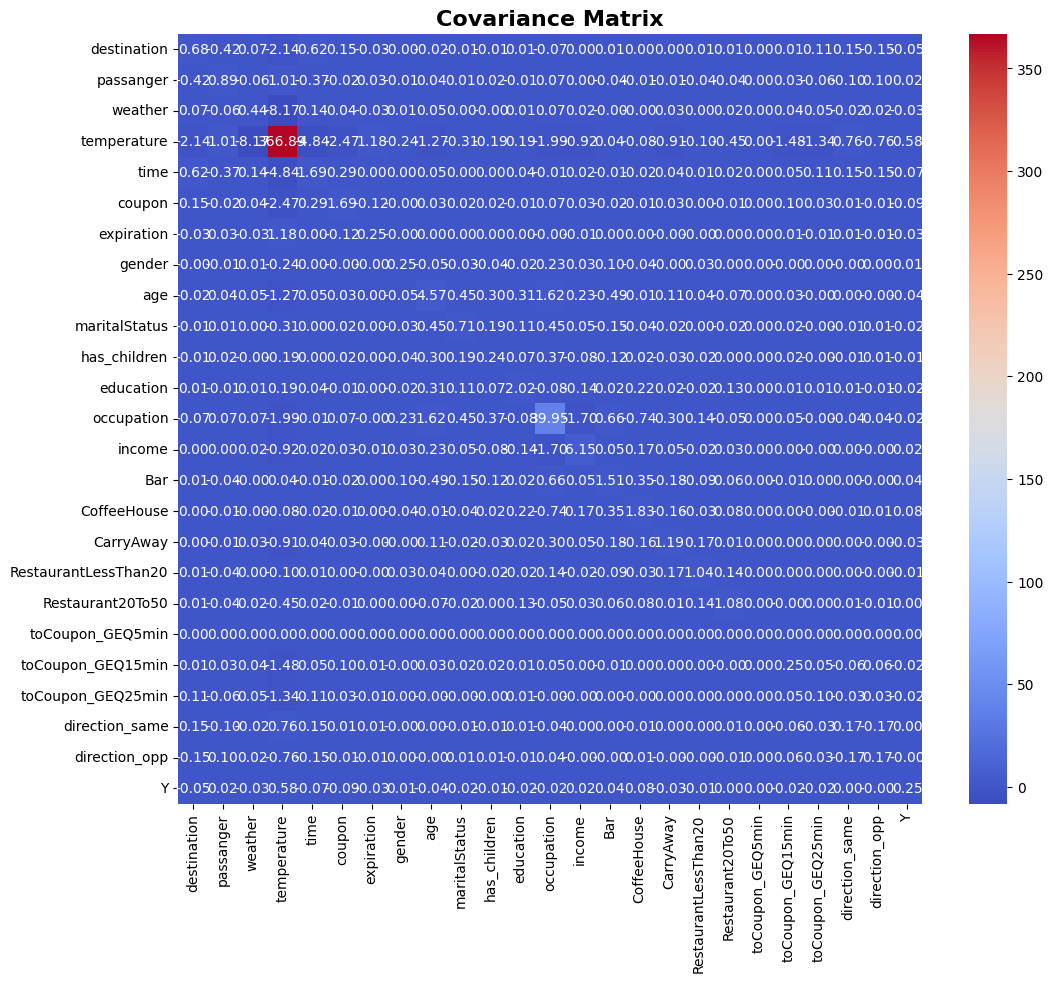

In [57]:
plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Covariance Matrix", fontsize=16, weight='bold')
# plt.savefig('images/covariance_matrix.png')  # Save Plot
plt.show()

### Notes and Observations:
- **High Covariance** indicates that variables move together. A high positive covariance between two variables means that as one increases, the other also tends to increase.
- **Low or Negative Covariance** indicates an inverse or weak relationship.

<div style="text-align: center;">
  <h1>Findings, Next steps and recommendations</h1>
</div>

#### **This covariance matrix can help understand the interdependencies between variables in the dataset and identify patterns that may be important for further analysis or predictive modeling.**

### Conclusions from the Covariance Matrix:

The covariance matrix shows the relationships between variables in the dataset. Here are some key points:

1. **Strong Negative Covariances**:
   - `temperature` with many variables (`destination`, `weather`, `Bar`), indicating that as the temperature increases, these variables tend to decrease and vice versa.
   
2. **Strong Positive Covariances**:
   - `destination` and `time` (0.622): Destinations and time have a positive relationship, suggesting that certain combinations of destinations and time are more common together.
   - `coupon` and `destination` (0.150): There is a positive relationship between coupons and destinations.

3. **Notable Relationships**:
   - `age` and `maritalStatus` (0.447): Age has a positive relationship with marital status.
   - `education` and `occupation` (0.133): Education has a positive relationship with occupation.
   - `toCoupon_GEQ25min` and `direction_same` (0.111): There is a small positive relationship between the time to the coupon and the same direction.

## Another Analysis of the Data for **CoffeeHouse** in **df_mod**

To explore other groups of coupons and determine the characteristics of passengers who accept them, the following columns were considered:

1. **`CoffeeHouse`**:
   - Analyze coupon acceptance for coffee houses and observe how passenger characteristics vary compared to those for the **bar**.

2. **`CarryAway`**:
   - Investigate how many passengers accept take-away coupons and what factors may influence this decision.

3. **`RestaurantLessThan20` or `Restaurant20To50`**:
   - Examine coupon acceptance in restaurants and see if there are patterns related to visit frequency or passenger age.

### Analysis

For the `CoffeeHouse` group, the acceptance rate is:

```python
# Filter rows where 'CoffeeHouse' is not null
valid_entries_coffee = df[df['CoffeeHouse'].notnull()]

# Calculate acceptance rate
acceptance_coffee = valid_entries_coffee['Y'].mean()

# Characteristics of passengers who accept coupons
group_coffee_accepted = valid_entries_coffee[valid_entries_coffee['Y'] == 1]

# Analyzing characteristics such as age, gender, etc.
age_distribution = group_coffee_accepted['age'].describe()
print(f'Acceptance rate in CoffeeHouse: {acceptance_coffee:.2f}')
print('Age distribution of passengers who accept coupons:')
print(age_distribution)
```

In this case use dataFrame: **df_mod**

In [58]:
valid_entries_coffee = df_mod[df_mod['CoffeeHouse'].notnull()]

In [59]:
acceptance_coffee = valid_entries_coffee['Y'].mean()

In [60]:
group_coffee_accepted = valid_entries_coffee[valid_entries_coffee['Y'] == 1]

In [61]:
age_distribution = group_coffee_accepted['age'].describe()
print('==================================================')
print(f'Acceptance Rate in CoffeeHouse: {acceptance_coffee:.2f}')
print('==================================================')
print('Age Distribution of Passengers Who Accept Coupons:')
print(age_distribution)
print('==================================================')
print('Note: Here df_mod was used.')

Acceptance Rate in CoffeeHouse: 0.57
Age Distribution of Passengers Who Accept Coupons:
count     7210
unique       8
top         21
freq      1587
Name: age, dtype: object
Note: Here df_mod was used.


### End!, Full Hardwork!, Thank God!
### Thank you!

**Technologies Used:** GNU Emacs, PyCharm, LibreOffice Calc, Anaconda, Jupyter, Python, Python Libraries, LaTeX Editor TexMaker, Sublime Text, Vim, Ubuntu 22.04 LTS, Shell Script (Bash), Git.